In [36]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io, filters, feature
%matplotlib inline 

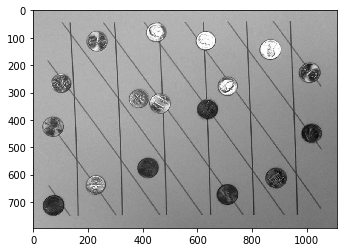

In [4]:
image = cv.imread("resources/coins.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(image, cmap = "gray")


In [254]:
def Hough2(image, theta_perc, p_perc):
    edges_roberts = filters.roberts(image)
    edges_roberts = ((edges_roberts - edges_roberts.min()) / (edges_roberts.max() - edges_roberts.min())) * 255
    _, bin_edges = cv.threshold(edges_roberts, 60, 1, cv.THRESH_BINARY)
    edge_points = np.argwhere(bin_edges == 1)
    print(len(edge_points))
    theta_range = np.linspace(0, np.pi, theta_perc)
    p_max = int(np.hypot(image.shape[0], image.shape[1]))
    p_min = int(-p_max)
    M = np.zeros((theta_perc, (p_max - p_min) // p_perc))

    for j, e in enumerate(edge_points):
        for i,theta in enumerate(theta_range):
            p = e[0] * np.cos(theta) + e[1] * np.sin(theta)
            p_ = round(p, -1)
            p_index = int((p_ - p_min) // p_perc)
            M[i, p_index] += 1
        print(j)


    lines = []
    valid = np.argwhere(M > 30)
    for v in valid:
        theta = v[0] * (np.pi / 180)
        p = p_min + p_perc * v[1]
        lines.append([p, theta])
        print(p, theta)
    return lines


In [238]:
def Hough(image):
    edge_x = cv.Sobel(image, cv.CV_64F, 1, 0)
    edge_y = cv.Sobel(image, cv.CV_64F, 0, 1)
    edges = np.hypot(edge_x, edge_y)
    directions = np.arctan2(edge_y, edge_x)
    edges = ((edges - edges.min()) / (edges.max() - edges.min())) * 255
    _, bin_edges = cv.threshold(edges, 50, 1, cv.THRESH_BINARY)
    edge_points = np.argwhere(bin_edges == 1)
    theta_range = np.arange(0, np.pi, 1)
    M = {}
    j = 0
    for i, e in enumerate(edge_points):
        gradient = round(directions[e[0], e[1]], 1)
        p = round(e[0] * np.cos(gradient) + e[1] * np.sin(gradient), -1)
        if gradient in M.keys():
            if p in M[gradient].keys():
                M[gradient][p] += 1
                j += 1

            else:
                M[gradient][p] = 1
        else:
            M[gradient] = {p : 1}

    lines = []
    for theta in M.keys():
        ps = np.array(list(M[theta].items()))
        valids = ps[ps[:,1] > 50]
        for v in valids:
            lines.append([v[0], theta, v[1]])
    return lines

True

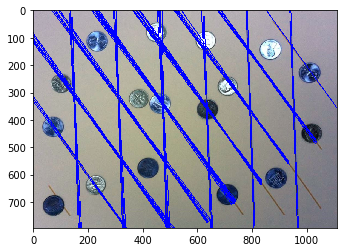

In [53]:
import cv2
import numpy as np

img = cv2.imread('resources/coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,170)
#lines = Hough2(image, 180, 10)
for l in lines:
    theta = l[0][1]

    rho = l[0][0]
    a = np.cos(theta) 
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1, y1),(x2,y2),(0,0,255),2)

plt.imshow(img, cmap = "gray")
cv2.imwrite('houghlines3.jpg',img)



In [59]:
lines

array([[[-302.       ,    2.5132742]],

       [[ -61.       ,    2.5132742]],

       [[-306.       ,    2.5132742]],

       [[ -65.       ,    2.5132742]],

       [[-424.       ,    2.5132742]],

       [[-299.       ,    3.106686 ]],

       [[  64.       ,    2.5132742]],

       [[-428.       ,    2.5132742]],

       [[-778.       ,    3.106686 ]],

       [[-131.       ,    3.0892327]],

       [[-181.       ,    2.5132742]],

       [[-186.       ,    2.5132742]],

       [[-941.       ,    3.106686 ]],

       [[-937.       ,    3.106686 ]],

       [[-464.       ,    3.106686 ]],

       [[-782.       ,    3.106686 ]],

       [[ -54.       ,    2.4958208]],

       [[-138.       ,    3.106686 ]],

       [[-135.       ,    3.0892327]],

       [[-620.       ,    3.106686 ]],

       [[  60.       ,    2.5132742]],

       [[  52.       ,    2.5307274]],

       [[-297.       ,    3.0892327]],

       [[-184.       ,    2.5132742]],

       [[-292.       ,    2.4958208]],



In [241]:
edges_sobel = filters.sobel(image)
edges_roberts = filters.roberts(image)
edges_prewitt = filters.prewitt(image)

0.0

(array([  0, 255], dtype=uint8), array([845087,  37363], dtype=int64))


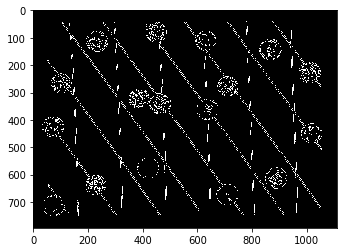

In [35]:

edges = cv.Canny(image, 100, 200)
print(np.unique(edges, return_counts = True))
#_,bin_edge = cv.threshold(image, 128, 255, cv.THRESH_BINARY)
plt.imshow(edges, cmap = "gray")